<div style='background-color : lightgreen'>
    <a id='TableOfContents'></a>
    <h1 style='text-align : center; padding-top: 20px; font-family: cursive;'>
        Table of Contents
    </h1>
    <ul style='list-style-type:none; display: flex; justify-content: center; margin-bottom: 30px;padding-left: 100px;'>
        <li style='margin-right: 20px;'><a href='#imports'>Imports</a></li>
        <li style='margin-right: 20px;'><a href='#q1'>Question 1</a></li>
        <li style='margin-right: 20px;'><a href='#q2'>Question 2</a></li>
        <li style='margin-right: 20px;'><a href='#q3'>Question 3</a></li>
        <li style='margin-right: 20px;'><a href='#q4'>Question 4</a></li>
        <li style='margin-right: 20px;'><a href='#q5'>Question 5</a></li>
        <li style='margin-right: 20px;'><a href='#q6'>Question 6</a></li>
        <li style='margin-right: 20px;'><a href='#q7'>Question 7</a></li>
        <li style='margin-right: 20px;'><a href='#q8'>Question 8</a></li>
        <li><a href='#bonus'>Bonus</a></li>
    </ul>
</div>


<div style='background-color : lightblue'>
<a id='imports'></a>
    <b><u><i><h1 style='text-align : center;padding-top: 25px;''>
        Imports
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
from env import get_db_url

from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

import acquire as a
import prepare as p

In [2]:
# setting basic style parameters for matplotlib
# plt.rc('figure', figsize=(13, 7))


<div style='background-color : lightblue'>
<a id='q1'></a>
    <b><u><i><h1 style='text-align : center; padding-top: 25px;''>
        Question 1
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

<b>Question 1.</b> Spam Data: Load the spam data set.
- Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
- Is there any overlap in the bigrams for the spam data and the ham data?
- Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.


In [3]:
url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url)
df.head()

,id,label,text
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
def train_val_test(df, stratify=False, target=None):
    train_validate, test = train_test_split(df,
                                            random_state=706,
                                            train_size=0.8,
                                            stratify=df[target] if stratify else None)
    train, val = train_test_split(train_validate,
                                  random_state=706,
                                  train_size=0.7,
                                  stratify=train_validate[target] if stratify else None)
    return train, val, test


In [5]:
train, val, test = train_val_test(df, stratify=True, target='label')

In [6]:
train.shape, val.shape, test.shape

((3119, 3), (1338, 3), (1115, 3))

In [7]:
ham_df = train[train.label=='ham']

In [8]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [9]:
ham_words = clean(' '.join(train[train.label=='ham']['text']))
spam_words = clean(' '.join(train[train.label=='spam']['text']))
all_words = clean(' '.join(train['text']))

In [10]:
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [11]:
word_counts = pd.concat([ham_freq, spam_freq,all_freq], axis=1
         ).fillna(0
                 ).astype(int)
word_counts.columns = ['ham','spam','all']
word_counts.head()

,ham,spam,all
im,257,5,262
get,180,45,225
ok,149,2,151
go,149,18,167
dont,148,14,162


In [12]:
word_counts.sort_values('all', ascending=False).head()

,ham,spam,all
call,138,193,331
im,257,5,262
ur,140,94,234
get,180,45,225
4,101,70,171


<AxesSubplot:>

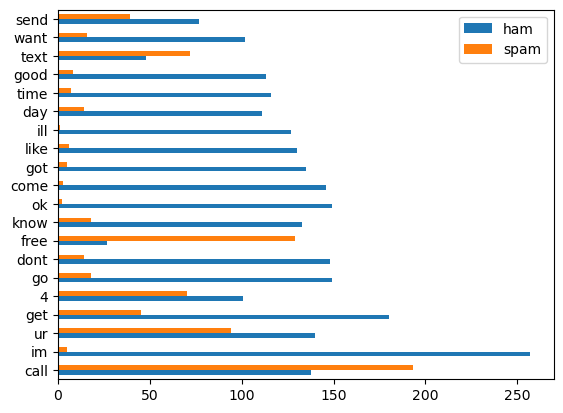

In [13]:
word_counts.sort_values('all', ascending=False
                       )[['ham','spam']].head(20).plot.barh()

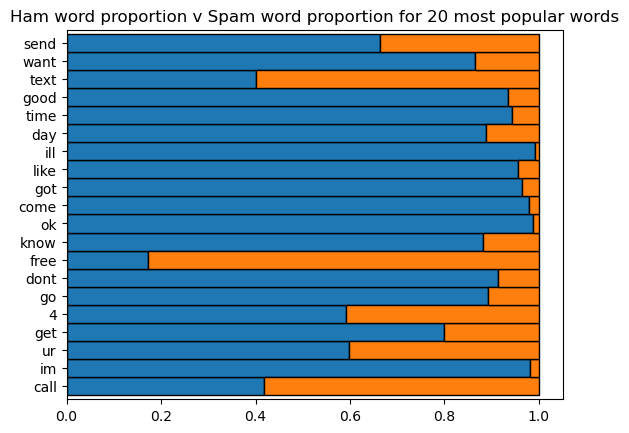

In [14]:
word_counts.sort_values('all', ascending=False
                       ).head(20).apply(
    lambda row: row/row['all'], axis=1
)[['ham','spam']].plot.barh(
    stacked=True, legend=False, ec='black', 
    width=1).set(title='Ham word proportion v Spam word proportion for 20 most popular words');
                                                         

<AxesSubplot:>

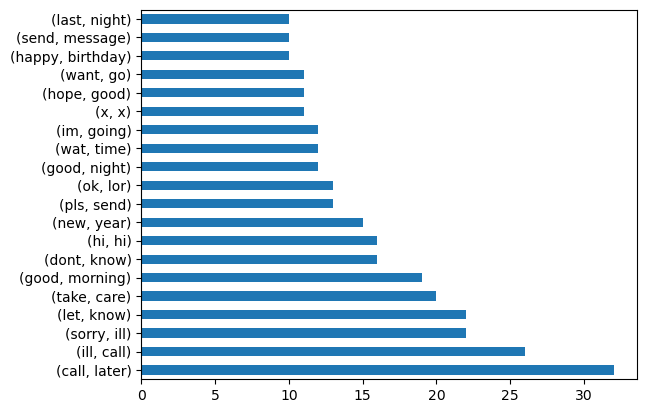

In [15]:
pd.Series(nltk.bigrams(ham_words)).value_counts().head(20).plot.barh()

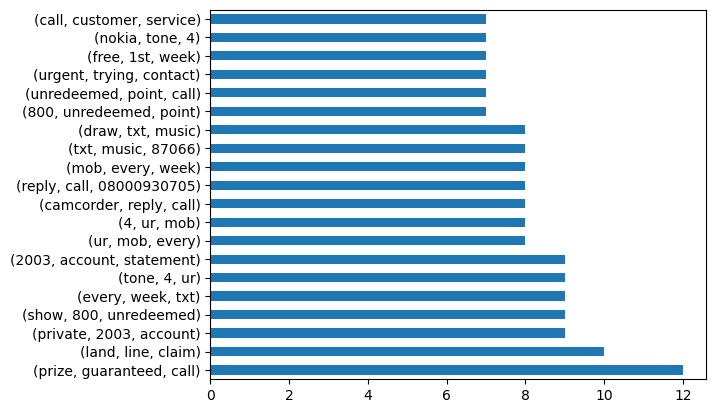

In [16]:
pd.Series(nltk.ngrams(spam_words, 3)
         ).value_counts().head(20).plot.barh()
plt.show()

In [17]:
# wordcloud expects a single string
img = WordCloud(background_color='White',
         ).generate(' '.join(ham_words))

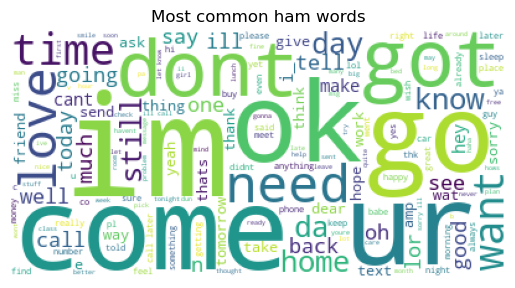

In [18]:
plt.imshow(img)
plt.axis('off')
plt.title('Most common ham words')
plt.show()

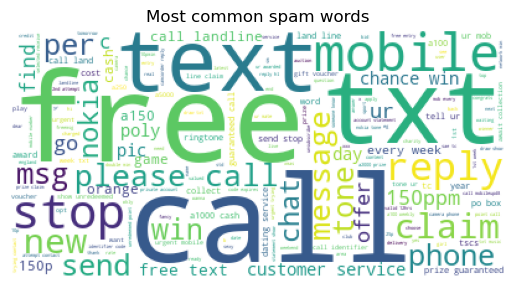

In [19]:
img = WordCloud(background_color='White',
         ).generate(' '.join(spam_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most common spam words')
plt.show()

<div style='background-color : lightblue'>
    <a id='modeling'></a>
    <b><u><i><h1 style='text-align : center; padding-top: 25px;'>
        Modeling
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a></li>
</div>


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix


### Decision Tree

In [22]:
train['clean_text'] = train.text.apply(clean).apply(' '.join)

In [24]:
train.head()

,id,label,text,clean_text
4260,4260,ham,Pls dont forget to study,pls dont forget study
3607,3607,ham,Pls come quick cant bare this.,pls come quick cant bare
3018,3018,ham,Wat time do u wan 2 meet me later?,wat time wan meet later
96,96,ham,Watching telugu movie..wat abt u?,watching telugu moviewat abt
3832,3832,ham,I had askd u a question some hours before. Its...,askd question hour answer


In [26]:
val['clean_text'] = val.text.apply(clean).apply(' '.join)

In [27]:
test['clean_text'] = test.text.apply(clean).apply(' '.join)

In [44]:
x_train = train['clean_text']
y_train = train.label

x_val = val['clean_text']
y_val = val.label


x_test = test['clean_text']
y_test = test.label



In [45]:
baseline = train.label.value_counts(normalize=True)[0]

In [63]:
tfidf = TfidfVectorizer()
X_bow = tfidf.fit_transform(x_train)
tree = DecisionTreeClassifier(max_depth=15)
tree.fit(X_bow, y_train)
tree.score(X_bow, y_train)

0.9836486053222186

In [64]:
x_val_bow = tfidf.transform(x_val)
tree.score(x_val_bow, y_val)

0.952914798206278

In [65]:
print('Accuracy of Random Tree classifier on training set: {:.2f}'
     .format(tree.score(X_bow, y_train)))
print('Accuracy of Random Tree classifier on validation set: {:.2f}'
     .format(tree.score(x_val_bow, y_val)))

Accuracy of Random Tree classifier on training set: 0.98
Accuracy of Random Tree classifier on validation set: 0.95


In [66]:
pd.Series(
    dict(
    zip(tfidf.get_feature_names_out(), 
    tree.feature_importances_))).sort_values(ascending=False).head()

call       0.350210
txt        0.205692
reply      0.077926
free       0.048300
service    0.027299
dtype: float64

### Naive Bayes

In [53]:
from sklearn.naive_bayes import MultinomialNB

In [56]:
tfidf = TfidfVectorizer()
nb = MultinomialNB()
X_bow = tfidf.fit_transform(x_train)
nb.fit(X_bow, y_train)
nb.score(X_bow, y_train)

0.975953831356204

In [57]:
x_val_bow = tfidf.transform(x_val)
nb.score(x_val_bow, y_val)

0.9618834080717489

In [60]:
print('Accuracy of Naive_bayes classifier on training set: {:.2f}'
     .format(tree.score(X_bow, y_train)))
print('Accuracy of Naive_bayes classifier on validation set: {:.2f}'
     .format(tree.score(x_val_bow, y_val)))

Accuracy of Naive_bayes classifier on training set: 0.98
Accuracy of Naive_bayes classifier on validation set: 0.95


In [62]:
pd.Series(
    dict(
    zip(tfidf.get_feature_names_out(), 
    tree.feature_importances_))).sort_values(ascending=False).head()

call     0.350210
txt      0.205692
reply    0.077926
free     0.048672
claim    0.026564
dtype: float64

In [68]:
x_test_bow = tfidf.transform(x_test)
nb.score(x_test_bow, y_test)

0.957847533632287



<div style='background-color : lightblue'>
<a id='q5'></a>
    <b><u><i><h1 style='text-align : center; padding-top: 25px;''>
        Question 5
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

<b>Question 5.</b> 

<div style='background-color : lightblue'>
<a id='q6'></a>
    <b><u><i><h1 style='text-align : center; padding-top: 25px;''>
        Question 6
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

<b>Question 6.</b> 

<div style='background-color : lightblue'>
<a id='q7'></a>
    <b><u><i><h1 style='text-align : center; padding-top: 25px;''>
        Question 7
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

<b>Question 7.</b> 

<div style='background-color : lightblue'>
<a id='q8'></a>
    <b><u><i><h1 style='text-align : center; padding-top: 25px;''>
        Question 8
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

<b>Question 8.</b> 

<div style='background-color : lightblue'>
<a id='q9'></a>
    <b><u><i><h1 style='text-align : center; padding-top: 25px;''>
        Question 9
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

<b>Question 9.</b>  



<div style='background-color : lightblue'>
<a id='bonus'></a>
    <b><u><i><h1 style='text-align : center; padding-top: 25px;''>
        Bonus
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>